In [1]:
import pandas as pd
import numpy as np
import math
from itertools import cycle
import statistics
import shap


#from datetime import datetime
import datetime

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import style
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import shap

from scipy.stats import randint, uniform, shapiro
import scikitplot as skplt
import sklearn as sk
from sklearn import linear_model

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer, PowerTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import lightgbm as ltb
import xgboost as xgb

import statsmodels.api as sm
import statsmodels
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
from statsmodels.tools import eval_measures
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_white


from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from fredapi import Fred
import pandas_datareader as pdr

import warnings

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
sk.set_config(display='diagram')
warnings.filterwarnings("ignore")
shap.initjs()

# Plotting using Seaborn
sns.set(style="whitegrid")
style.use("seaborn-white")

In [3]:
fred = Fred(api_key='c0a3f23bdd23a65e6546b6d0e5f4d4a5')

In [4]:
from common.load_features import get_recession, add_recession_feature, get_fed_chair, add_fed_chair
from common.load_data import load_taylor,load_misery, time_split
from common.calc_metrics import model_results
from common.LinearRegDiagnostic import LinearRegDiagnostic

# Setup

## variables

In [5]:
rand_int = 12

#  Set start date
start_date = datetime.date(1940, 1, 1)
start_date_str = datetime.datetime.strftime(start_date, "%Y-%m-%d")

#  Federal Reserve Economic Data Service
data_source = 'fred'

In [12]:
t1_df = pdr.DataReader(['FEDFUNDS'], data_source, start_date)
t1_df['FEDFUNDS_diff'] = t1_df['FEDFUNDS'].diff()
t1_df

,FEDFUNDS,FEDFUNDS_diff
DATE,,
1954-09-30,1.030000,0.135000
1954-12-31,0.986667,0.070000
1955-03-31,1.343333,0.023333
1955-06-30,1.500000,0.096667
1955-09-30,1.940000,0.180000
...,...,...
2022-12-31,3.653333,0.513333
2023-03-31,4.516667,0.183333
2023-06-30,4.990000,0.143333


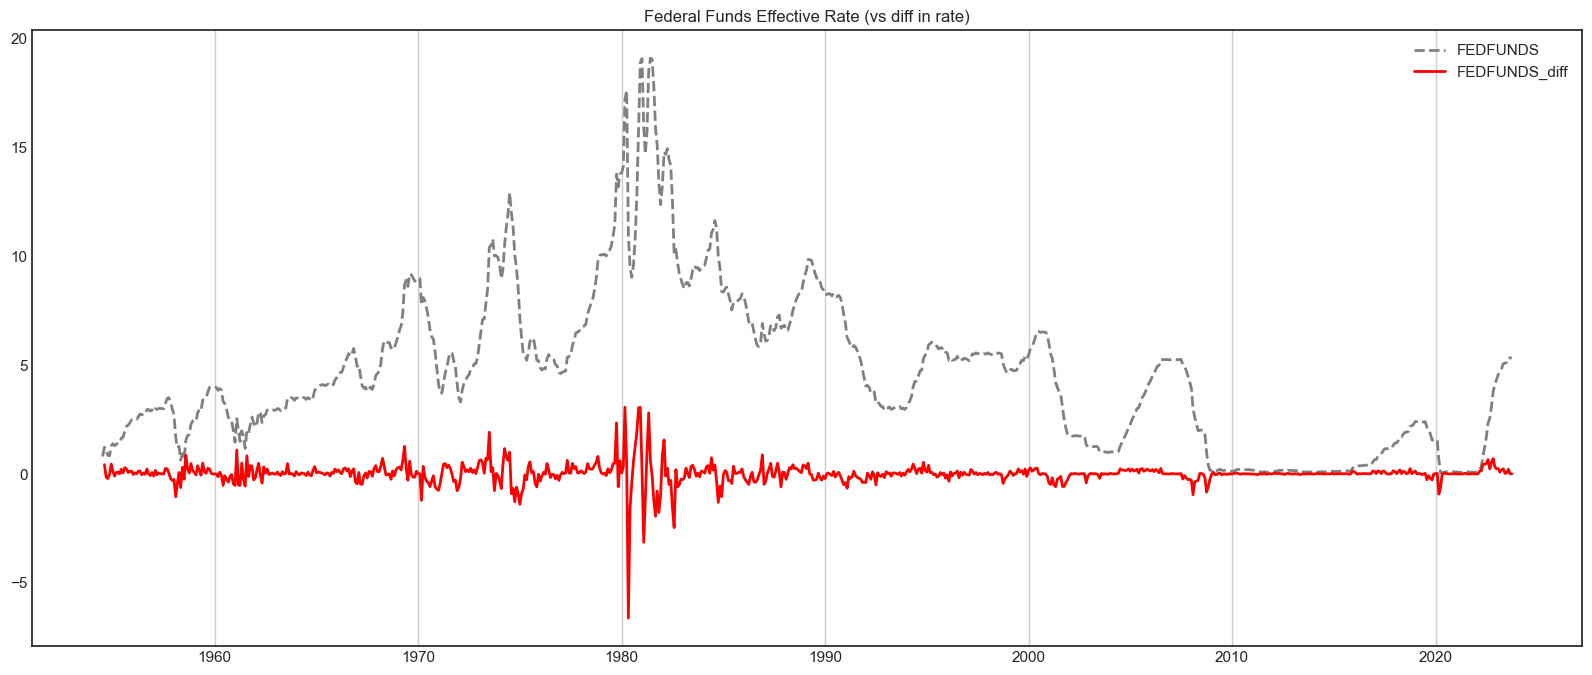

In [10]:
# Graph
fig, ax = plt.subplots(figsize=(20,8))
ax.xaxis.grid()

# Plot
ax.plot(t1_df.index, t1_df['FEDFUNDS'], 'gray', linestyle='--', linewidth=2)
ax.plot(t1_df.index, t1_df['FEDFUNDS_diff'], 'red', linewidth=2)
ax.legend(["FEDFUNDS","FEDFUNDS_diff"])
ax.set(title='Federal Funds Effective Rate (vs diff in rate)');
plt.show()

In [13]:
t2_df = t1_df.resample('Q').mean()
t2_df

,FEDFUNDS,FEDFUNDS_diff
DATE,,
1954-09-30,1.030000,0.135000
1954-12-31,0.986667,0.070000
1955-03-31,1.343333,0.023333
1955-06-30,1.500000,0.096667
1955-09-30,1.940000,0.180000
...,...,...
2022-12-31,3.653333,0.513333
2023-03-31,4.516667,0.183333
2023-06-30,4.990000,0.143333


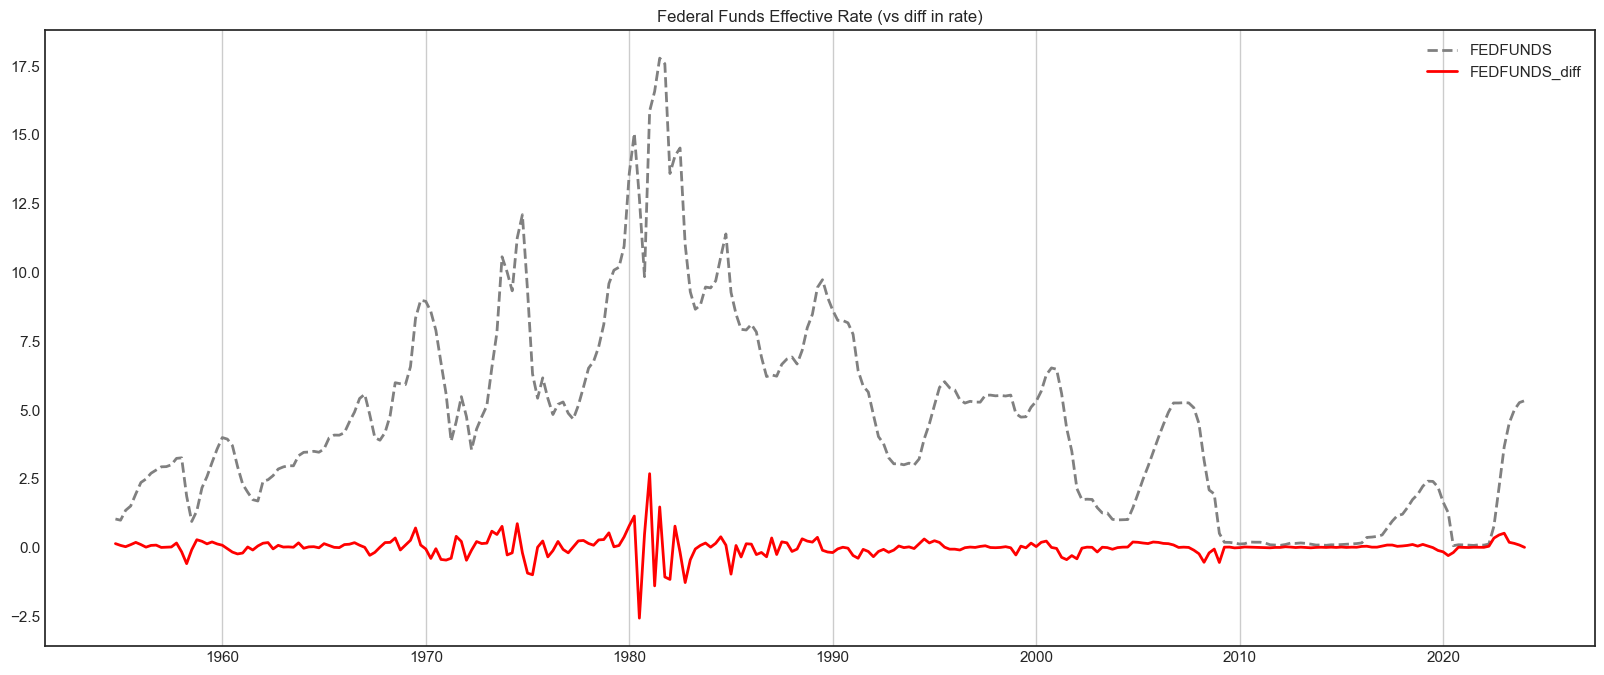

In [14]:
# Graph
fig, ax = plt.subplots(figsize=(20,8))
ax.xaxis.grid()

# Plot
ax.plot(t1_df.index, t1_df['FEDFUNDS'], 'gray', linestyle='--', linewidth=2)
ax.plot(t1_df.index, t1_df['FEDFUNDS_diff'], 'red', linewidth=2)
ax.legend(["FEDFUNDS","FEDFUNDS_diff"])
ax.set(title='Federal Funds Effective Rate (vs diff in rate)');
plt.show()